In [60]:
import pandas as pd
import scipy as sp
import numpy as np
from math import sin, exp
import matplotlib.pyplot as plt 
import re
from numpy import linalg
from scipy import optimize

In [61]:
def f(x):
    return sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)

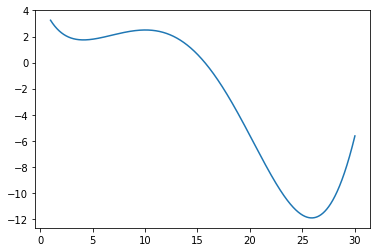

In [62]:
x = np.arange(1, 30, 0.001)
y = np.array([f(i) for i in x])
plt.plot(x, y)

In [63]:
min1 = round(optimize.minimize(f, 2, method='BFGS')['fun'], 2)
min2 = round(optimize.minimize(f, 30, method='BFGS')['fun'], 3)
mins = [min1, min2]

In [64]:
output = open('output1.txt', 'w')
output.write(' '.join([str(i) for i in mins]))

12